In [52]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
data = pd.read_csv('data/flipkart_com-ecommerce_sample.csv')
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [3]:
data.sample()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
9317,43b189c5bc53a0d6deb82d16177daba9,2016-05-10 11:57:25 +0000,http://www.flipkart.com/coirfit-single-coir-ma...,COIRFIT Single Coir Mattress,"[""COIRFIT Single Coir Mattress""]",BEMEGFHSMHZYNZB8,10393.0,7794.0,"[""http://img5a.flixcart.com/image/bed-mattress...",False,Key Features of COIRFIT Single Coir Mattress S...,No rating available,No rating available,COIRFIT,"{""product_specification""=>[{""value""=>""1 MATTRE..."


In [4]:
data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [5]:
data = data.drop(['pid', 'crawl_timestamp', 'product_url', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'product_rating','overall_rating','brand'],axis=1)

In [6]:
data.head()

,uniq_id,product_name,product_category_tree,description,product_specifications
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [7]:
data['uniq_id'].nunique()

20000

In [8]:
data.shape

(20000, 5)

In [9]:
data.dtypes

uniq_id                   object
product_name              object
product_category_tree     object
description               object
product_specifications    object
dtype: object

In [10]:
data['product_category_tree'][3]

'["Clothing >> Women\'s Clothing >> Lingerie, Sleep & Swimwear >> Shorts >> Alisha Shorts >> Alisha Solid Women\'s Cycling Shorts"]'

# Removing unnecessary symbols from String

In [11]:
def repair(text):
    text = str(text)
    pattern = re.compile('[\([{})\]]')
    text= pattern.sub(r'',text)
    text = text.replace('"','')
    text = text.replace(',','')
    text = text.replace('&','')
    pattern = re.compile('>>')
    return pattern.sub(r'',text)

In [12]:
repair('["Clothing >> Women\'s Clothing >> Lingerie, Sleep & Swimwear >> Shorts >> Alisha Shorts >> Alisha Solid Women\'s Cycling Shorts"]')

"Clothing  Women's Clothing  Lingerie Sleep  Swimwear  Shorts  Alisha Shorts  Alisha Solid Women's Cycling Shorts"

In [13]:
data['product_category_tree'] = data['product_category_tree'].apply(repair)

In [14]:
data.sample(3)

,uniq_id,product_name,product_category_tree,description,product_specifications
6106,a10481d82ca179722097bbd8e7a99899,Priya Exports Kitty Cat Art Fabric Pencil Box,Pens Stationery School Supplies Geometry Pe...,Flipkart.com: Buy Priya Exports Kitty Cat Art ...,"{""product_specification""=>[{""key""=>""Model Name..."
13677,ee039b88fd6714e9bd3b8bdb85f259a8,DailyObjects Back Cover for Apple iPad 2/3/4,Mobiles Accessories Tablet Accessories Case...,DailyObjects Back Cover for Apple iPad 2/3/4 (...,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
6116,ceaf35514052ee9e7d3596981a804814,Jewelizer Alloy Necklace,Jewellery Necklaces Chains Necklaces,Jewelizer Alloy Necklace - Buy Jewelizer Alloy...,"{""product_specification""=>[{""key""=>""Collection..."


In [15]:
data['description'][0]

"Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTHT_3P_21 In the Box 3 shorts"

In [16]:
data['product_specifications'][0]

'{"product_specification"=>[{"key"=>"Number of Contents in Sales Package", "value"=>"Pack of 3"}, {"key"=>"Fabric", "value"=>"Cotton Lycra"}, {"key"=>"Type", "value"=>"Cycling Shorts"}, {"key"=>"Pattern", "value"=>"Solid"}, {"key"=>"Ideal For", "value"=>"Women\'s"}, {"value"=>"Gentle Machine Wash in Lukewarm Water, Do Not Bleach"}, {"key"=>"Style Code", "value"=>"ALTHT_3P_21"}, {"value"=>"3 shorts"}]}'

# Dropping 'specs' because equivalent to Description

In [17]:
data = data.drop('product_specifications',axis=1)

In [18]:
data.head()

,uniq_id,product_name,product_category_tree,description
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Women's Cycling Shorts,Clothing Women's Clothing Lingerie Sleep Sw...,Key Features of Alisha Solid Women's Cycling S...
1,7f7036a6d550aaa89d34c77bd39a5e48,FabHomeDecor Fabric Double Sofa Bed,Furniture Living Room Furniture Sofa Beds F...,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies,Footwear Women's Footwear Ballerinas AW Bel...,Key Features of AW Bellies Sandals Wedges Heel...
3,0973b37acd0c664e3de26e97e5571454,Alisha Solid Women's Cycling Shorts,Clothing Women's Clothing Lingerie Sleep Sw...,Key Features of Alisha Solid Women's Cycling S...
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo,Pet Supplies Grooming Skin Coat Care Shamp...,Specifications of Sicons All Purpose Arnica Do...


# Creating a new column

In [19]:
data['desc'] = data['product_category_tree']+data['description']

In [20]:
data['desc'][0]

"Clothing  Women's Clothing  Lingerie Sleep  Swimwear  Shorts  Alisha Shorts  Alisha Solid Women's Cycling ShortsKey Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTHT_3P_21 In the Box 3 shorts"

In [21]:
data = data.drop(['product_category_tree','description'],axis=1)

In [22]:
data.head()

,uniq_id,product_name,desc
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Women's Cycling Shorts,Clothing Women's Clothing Lingerie Sleep Sw...
1,7f7036a6d550aaa89d34c77bd39a5e48,FabHomeDecor Fabric Double Sofa Bed,Furniture Living Room Furniture Sofa Beds F...
2,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies,Footwear Women's Footwear Ballerinas AW Bel...
3,0973b37acd0c664e3de26e97e5571454,Alisha Solid Women's Cycling Shorts,Clothing Women's Clothing Lingerie Sleep Sw...
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo,Pet Supplies Grooming Skin Coat Care Shamp...


# Stemming : 
* Converting each word in string to its root form understandable universally

In [23]:
data['desc']= data['desc'].str.lower()

In [24]:
def stemming(text):
    text = str(text)
    stemmer = PorterStemmer()
    return " ".join([stemmer.stem(word) for word in text.split()])

In [25]:
data.dtypes

uniq_id         object
product_name    object
desc            object
dtype: object

In [26]:
stemming("Clothing  Women's Clothing  Lingerie Sleep  Swimwear  Shorts  Alisha Shorts  Alisha Solid Women's Cycling ShortsKey Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTHT_3P_21 In the Box 3 shorts")

"cloth women' cloth lingeri sleep swimwear short alisha short alisha solid women' cycl shortskey featur of alisha solid women' cycl short cotton lycra navy, red, navy,specif of alisha solid women' cycl short short detail number of content in sale packag pack of 3 fabric cotton lycra type cycl short gener detail pattern solid ideal for women' fabric care gentl machin wash in lukewarm water, do not bleach addit detail style code altht_3p_21 in the box 3 short"

In [27]:
data['desc']= data['desc'].apply(stemming)

In [28]:
data.head()

,uniq_id,product_name,desc
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Women's Cycling Shorts,cloth women' cloth lingeri sleep swimwear shor...
1,7f7036a6d550aaa89d34c77bd39a5e48,FabHomeDecor Fabric Double Sofa Bed,furnitur live room furnitur sofa bed futon fab...
2,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies,footwear women' footwear ballerina aw belliesk...
3,0973b37acd0c664e3de26e97e5571454,Alisha Solid Women's Cycling Shorts,cloth women' cloth lingeri sleep swimwear shor...
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo,pet suppli groom skin coat care shampoo sicon ...


# Giving index to each uniq_id

In [29]:
for i in range(0,20000):
    data['uniq_id'][i] = i+1

# Function for recommending products

In [30]:
def recommend_products(product,similarity_model):
    product_index = data[data['product_name'] == product].index[0]
    distances = similarity_model[product_index]
    product_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x: x[1])[1:6]
    output={}
    name_list = []
    sim_list = []
    for x in product_list:
        prod_name = data.iloc[x[0]].product_name
        name_list.append(prod_name)
        prod_sim = np.round((x[1]*100),2)
        sim_list.append(prod_sim)
        
    print('Checked Product :::::   ',product)    
    name_list=np.array(name_list)
    sim_list=np.array(sim_list)
    dat = np.reshape([[name_list],[sim_list]],(2,5))
    df = pd.DataFrame(dat.T,columns=['Recommended Product','Similarity(%age)'],index=[0,1,2,3,4])
    return df

# TFIDF vectorizer

In [31]:
vect_tfidf = TfidfVectorizer(max_features=5000,stop_words='english')

In [32]:
fitter_tfidf = vect_tfidf.fit_transform(data['desc']).toarray()

In [33]:
vect_tfidf.get_feature_names()[4999]

C:\Users\91700\Desktop\recommend\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'zyxel'

# Cosine similarity:
* gets similarity of each data item to all other 
* 20000 elements with all 20000

In [34]:
similarity_tfidf = cosine_similarity(fitter_tfidf)

In [35]:
similarity_tfidf[0]

array([1.        , 0.02509378, 0.04255086, ..., 0.0040208 , 0.00399641,
       0.0040208 ])

In [36]:
np.shape(similarity_tfidf)

(20000, 20000)

# Enumerating similarity matrix

In [37]:
sorted(list(enumerate(similarity_tfidf[0])),reverse=True,key=lambda x: x[1])[1:6]

[(6, 0.98902755963913),
 (3, 0.9680745877374043),
 (9, 0.9624158492968882),
 (13, 0.9604502062072997),
 (15, 0.9599461287545704)]

In [38]:
s = 'Sicons All Purpose Arnica Dog Shampoo'
recommend_products(s,similarity_tfidf)

Checked Product :::::    Sicons All Purpose Arnica Dog Shampoo


,Recommended Product,Similarity(%age)
0,Sicons All Purpose Tea Tree Dog Shampoo,79.19
1,Sicons Conditioning Conditoner Dog Shampoo,76.81
2,TRESemme Naturals Vibrantly Smooth Shampoo,38.32
3,Magideal Raincoat for Dog,34.91
4,"Four Paws Sweats for Cat, Dog",34.5


# Similarity on a smaller Data
* 5000 data points only

In [41]:
data_small = data.iloc[:5000,:]

In [42]:
vect_tfidf = TfidfVectorizer(max_features=5000,stop_words='english')

In [43]:
fitter_tfidf = vect_tfidf.fit_transform(data_small['desc']).toarray()

In [44]:
vect_tfidf.get_feature_names()[4999]

C:\Users\91700\Desktop\recommend\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'zyaden'

In [45]:
similarity_tfidf = cosine_similarity(fitter_tfidf)

In [46]:
similarity_tfidf[0]

array([1.        , 0.0278509 , 0.04735819, ..., 0.        , 0.        ,
       0.        ])

In [47]:
np.shape(similarity_tfidf)

(5000, 5000)

In [48]:
sorted(list(enumerate(similarity_tfidf[0])),reverse=True,key=lambda x: x[1])[1:6]

[(3, 0.9982197036822437),
 (6, 0.9956489017077094),
 (9, 0.9909875740274393),
 (13, 0.9885242348143827),
 (15, 0.9879090021202782)]

In [49]:
s = 'Sicons All Purpose Arnica Dog Shampoo'
recommend_products(s,similarity_tfidf)

Checked Product :::::    Sicons All Purpose Arnica Dog Shampoo


,Recommended Product,Similarity(%age)
0,Sicons All Purpose Tea Tree Dog Shampoo,74.61
1,Sicons Conditioning Conditoner Dog Shampoo,72.13
2,Pawzone Rubber Rubber Toy For Dog,20.27
3,Rockmantra Dog Ceramic Mug,20.03
4,Snug Hug Jute Chew Toy For Dog,18.77


In [50]:
#import pickle
#pickle.dump(similarity_tfidf,open('similarity_tfidf.pkl','wb'))

In [53]:
df = recommend_products(s,similarity_tfidf)

Checked Product :::::    Sicons All Purpose Arnica Dog Shampoo


In [63]:
df['Similarity(%age)']=df['Similarity(%age)'].astype('float')

In [64]:
df.dtypes

Recommended Product     object
Similarity(%age)       float64
dtype: object

C:\Users\91700\Desktop\recommend\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


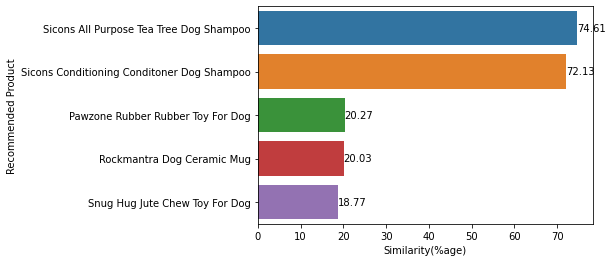

In [68]:
ax = sns.barplot(df['Similarity(%age)'],df['Recommended Product'])
ax.bar_label(ax.containers[0]);